In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/fire_nrt_V1_96617.csv")

In [3]:
data.head(6)

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0 -42.69706  147.70634       333.6  0.57   0.43  2019-10-01       336   
1 -42.26889  147.31104       336.2  0.39   0.44  2019-10-01       336   
2 -40.85202  145.38068       327.9  0.46   0.47  2019-10-01       336   
3 -42.39329  147.47144       346.9  0.38   0.43  2019-10-01       336   
4 -42.69701  147.70584       334.1  0.56   0.43  2019-10-01       336   
5 -42.77161  146.86771       353.9  0.41   0.45  2019-10-01       336   

  satellite instrument confidence version  bright_ti5  frp daynight  
0         N      VIIRS          n  1.0NRT       293.4  4.0        D  
1         N      VIIRS          n  1.0NRT       296.9  3.9        D  
2         N      VIIRS          n  1.0NRT       295.3  3.7        D  
3         N      VIIRS          n  1.0NRT       294.2  6.2        D  
4         N      VIIRS          n  1.0NRT       293.5  4.1        D  
5         N      VIIRS          n  1.0NRT       294.2  9.9        D

- **Bright_ti4:** VIIRS I-4 channel brightness temperature of the fire pixel measured in Kelvin.
- **Scan:** Along Scan pixel size 
- **Track:**	Along Track pixel size
- **Acq_Date:** Acquisition Date
- **Acq_Time:** Acquisition Time
- **Satellite:** N= Suomi National Polar-orbiting Partnership (Suomi NPP), 1=NOAA-20 (designated JPSS-1 prior to launch)
- **Confidence:** This value is based on a collection of intermediate algorithm quantities used in the detection process. It is intended to help users gauge the quality of individual hotspot/fire pixels. Confidence values are set to low, nominal and high. Low confidence daytime fire pixels are typically associated with areas of sun glint and lower relative temperature anomaly (<15K) in the mid-infrared channel I4. Nominal confidence pixels are those free of potential sun glint contamination during the day and marked by strong (>15K) temperature anomaly in either day or nighttime data. High confidence fire pixels are associated with day or nighttime saturated pixels.
- **Version:** Version (Collection and source)
- **Bright_ti5:**	Brightness temperature I-5
- **FRP:** Fire Radiative Power 	
- **DayNight:** Day or Night 	

## Task 1: Density Plots

1. Plot the longitude vs latitude several ways within a single figure (each in its own axes):
  1. Using the matplotlib defaults.
  2. Adjusting alpha and marker size to compensate for overplotting.
  3. Using a hexbin plot.
  4. Subsampling the dataset.

For each but the first one, ensure that all the plotting area is used in a reasonable way and thatas much information as possible is conveyed; this is somewhat subjective and there is no oneright answer.

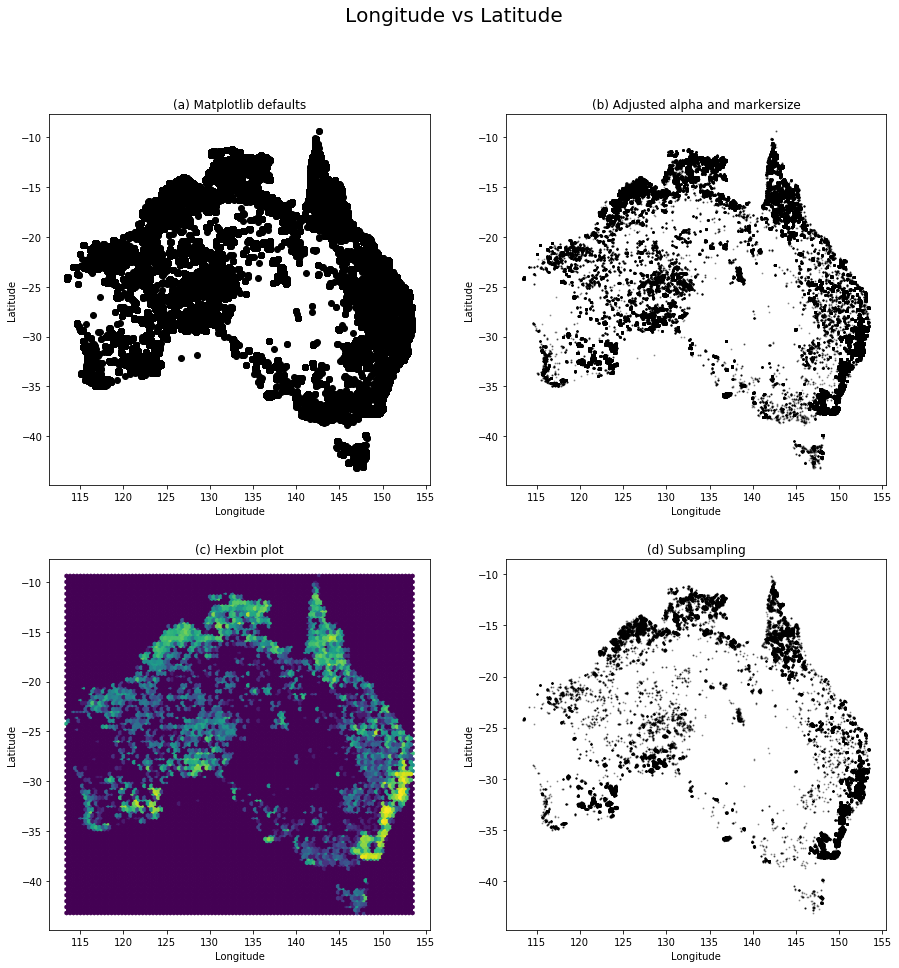

In [28]:
subsample = data.sample(n = int(len(data)/10), replace=False)

f, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15,15))

f.suptitle("Longitude vs Latitude", fontsize=20)

ax[0,0].scatter(data["longitude"], data["latitude"], c="k")
ax[0,1].scatter(data["longitude"], data["latitude"], alpha = 0.3, s = 1, c="k")
ax[1,0].hexbin(data["longitude"], data["latitude"], bins="log")
ax[1,1].scatter(subsample["longitude"], subsample["latitude"], alpha = 0.3, s = 1, c="k")

ax[0,0].set_title("(a) Matplotlib defaults")
ax[0,0].set_xlabel("Longitude")
ax[0,0].set_ylabel("Latitude")

ax[0,1].set_title("(b) Adjusted alpha and markersize")
ax[0,1].set_xlabel("Longitude")
ax[0,1].set_ylabel("Latitude")

ax[1,0].set_title("(c) Hexbin plot")
ax[1,0].set_xlabel("Longitude")
ax[1,0].set_ylabel("Latitude")

ax[1,1].set_title("(d) Subsampling")
ax[1,1].set_xlabel("Longitude")
ax[1,1].set_ylabel("Latitude")

plt.show()

## Task 2: Visualizing class membership

Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriate settings).
Let’s assume we are certain of a fire if the value of temperature I-4 is saturated asvisible from the histogram.

1. Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vslong for those points with brightness saturated and a separate for those who are not (within thesame figure on separate axes). You can pick any of the methods from 1.1 that you find mostsuitable. Can you spot differences in the distributions?
2. Plot both groups in the same axes with different colors. Try changing the order of plottingthe two classes (i.e. draw the saturated first then the non-saturated or the other way around).Make sure to include a legend. How does that impact the result?
3. Can you find a better way to compare the two distributions

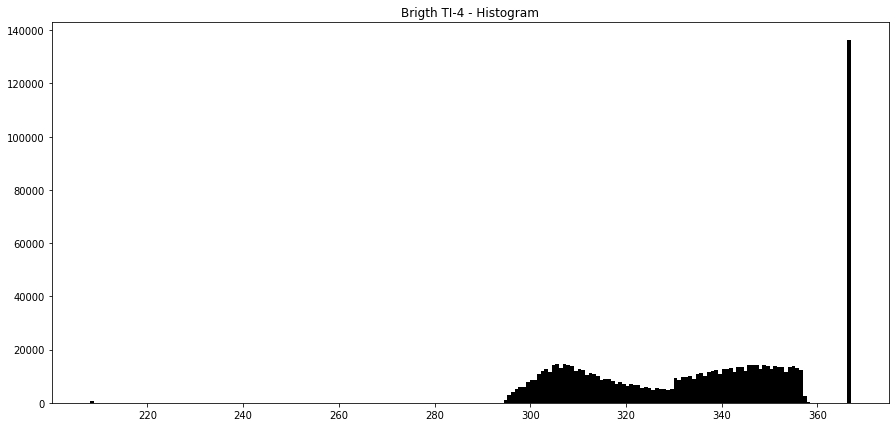

Bright of the most saturated ones
 [367.]


In [35]:
plt.figure(figsize=(15,7))
plt.hist(data["bright_ti4"],bins="auto", color="k")
plt.title("Brigth TI-4 - Histogram")
plt.show()
print("Bright of the most saturated ones\n", data["bright_ti4"].mode().values)

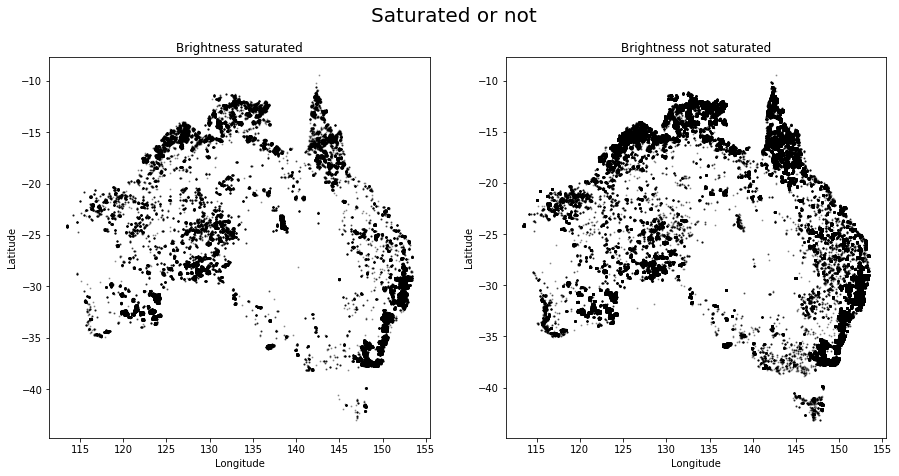

In [41]:
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,7))

f.suptitle("Saturated or not",fontsize=20)

ax[0].scatter(data[data["bright_ti4"]>=367]["longitude"],
              data[data["bright_ti4"]>=367]["latitude"], alpha = 0.3, s = 1, c="k")

ax[1].scatter(data[data["bright_ti4"]<367]["longitude"],
              data[data["bright_ti4"]<367]["latitude"], alpha = 0.3, s = 1, c="k")

ax[0].set_title("Brightness saturated")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")

ax[1].set_title("Brightness not saturated")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")

plt.show()

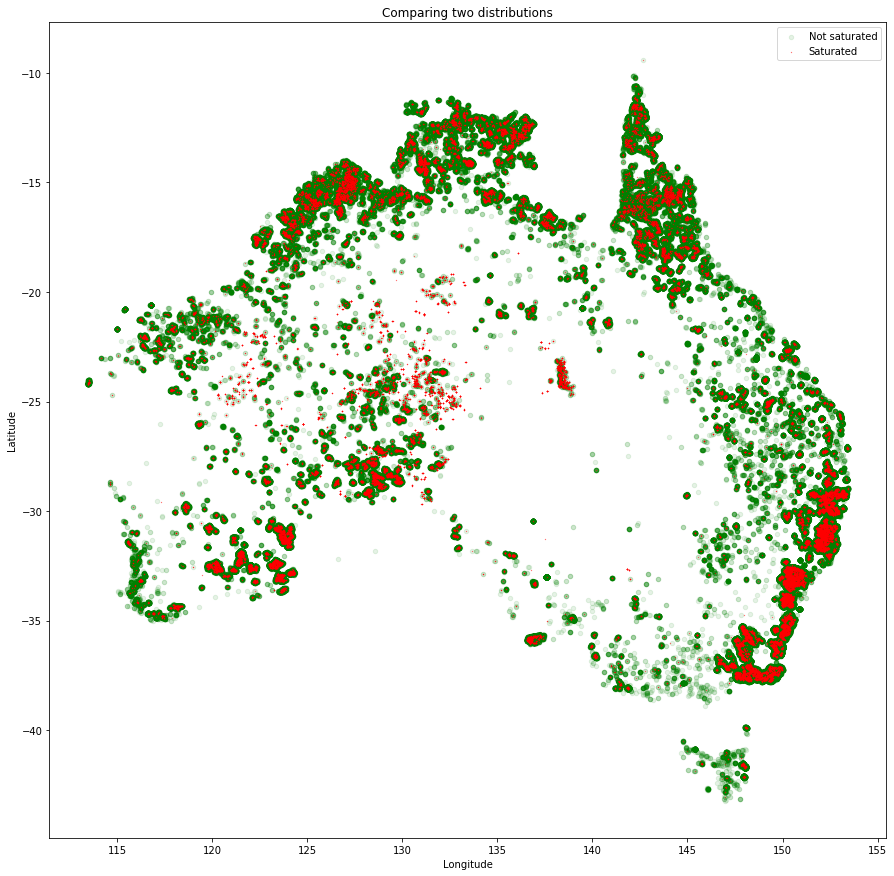

In [48]:
plt.figure(figsize=(15,15))

plt.scatter(data[data["bright_ti4"]<367]["longitude"],
              data[data["bright_ti4"]<367]["latitude"], alpha = 0.1, s = 20, c="g", label="Not saturated")

plt.scatter(data[data["bright_ti4"]>=367]["longitude"],
              data[data["bright_ti4"]>=367]["latitude"], s = 0.05, c="r",label="Saturated")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Comparing two distributions")
plt.legend()
plt.show()